## 1. Exploración del dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.datasets import load_iris

In [ ]:
# Cargar el dataset Iris
data = load_iris()
print(data.DESCR) # Descripcion de la base de datos

In [2]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [3]:
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Tamaño del dataset
print("\nTamaño del dataset:", df.shape)


Tamaño del dataset: (150, 5)


## 2. Reducción de dimensionalidad con PCA


In [5]:
# Definir una función para realizar y visualizar la reducción dimensional con PCA
def pca_analysis(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Explicación de la varianza
    explained_variance = pca.explained_variance_ratio_
    cumsum_variance = np.cumsum(explained_variance)
    
    print(f"\nComponentes: {n_components}")
    print("Varianza explicada por cada componente:", explained_variance)
    print("Varianza acumulada:", cumsum_variance)
    
    # Visualización de la varianza acumulada
    plt.figure()
    plt.plot(range(1, n_components+1), cumsum_variance, marker='o')
    plt.title('Varianza acumulada por PCA')
    plt.xlabel('Número de componentes principales')
    plt.ylabel('Varianza acumulada')
    plt.grid()
    plt.show()
    
    return X_pca

In [6]:
# Separar las características y la etiqueta
y = df['target']
X = df.drop('target', axis=1)


Componentes: 2
Varianza explicada por cada componente: [0.92461872 0.05306648]
Varianza acumulada: [0.92461872 0.97768521]


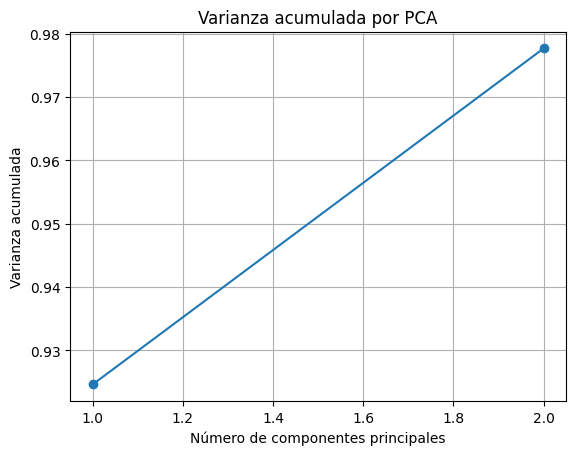

In [7]:
# Aplicar PCA con 2 componentes para visualización
X_pca_2 = pca_analysis(X, n_components=2)

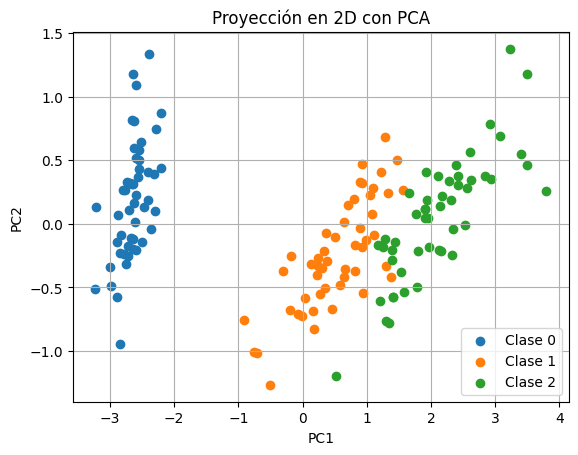

In [8]:
# Visualizar los datos proyectados en 2D
plt.figure()
for label in np.unique(y):
    plt.scatter(X_pca_2[y == label, 0], X_pca_2[y == label, 1], label=f'Clase {label}')
plt.title('Proyección en 2D con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

## 3. Reducción de dimensionalidad con NMF

In [9]:
# Definir una función para realizar y visualizar la reducción dimensional con NMF
def nmf_analysis(X, n_components):
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    X_nmf = nmf.fit_transform(X)
    
    print(f"\nComponentes: {n_components}")
    print("Reconstrucción del error:", nmf.reconstruction_err_)
    
    return X_nmf

In [10]:
# Aplicar NMF con 2 componentes
X_nmf_2 = nmf_analysis(X, n_components=2)


Componentes: 2
Reconstrucción del error: 3.9411578998456163


c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


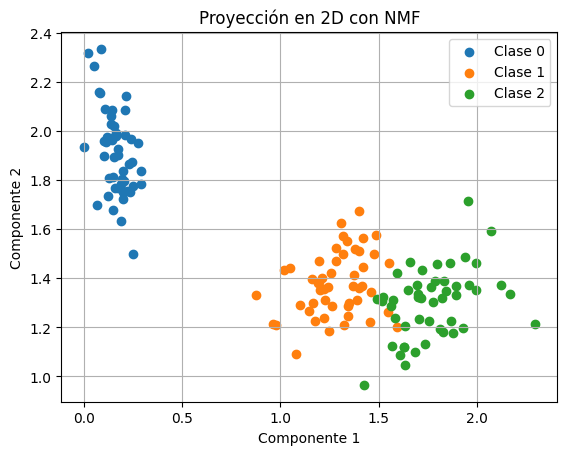

In [11]:
# Visualizar los datos proyectados en 2D
plt.figure()
for label in np.unique(y):
    plt.scatter(X_nmf_2[y == label, 0], X_nmf_2[y == label, 1], label=f'Clase {label}')
plt.title('Proyección en 2D con NMF')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid()
plt.show()